<h1>Homework 7: Signal Processing and Fourier Transform<h1>

**Problem 1**
The file **prob1.txt** below contains a mystery signal that was recorded after convolution with an
instrument whose response function has the form

$$
g(t)=\left\{\begin{array}{ll}0 & t<0 \\ \alpha\,e^{-\alpha\,t} & t\geq 0\end{array}\right.
$$

The sample rate was $10^3$ samples/s and the instrument response time constant,
$\tau=\alpha^{-1}$ was 0.1 s. Use the convolution theorem

$$
\mathcal{F}[f*g]=\mathcal{F}[f]\times \mathcal{F}[g]
$$

(where $\mathcal{F}[f]$ represents the Fourier transform of) to deduce the original signal. Prepare

a plot with a properly labeled time axis.

In [35]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [36]:
# import the data
data = np.loadtxt('prob1.txt')

# define g(t)
def g(t, alpha):
    if t<0:
        return 0
    else:
        return alpha*np.exp(-alpha*t)
    
# define the constants
tau = 0.1
alpha = 1/tau
sample_rate = 1/1000

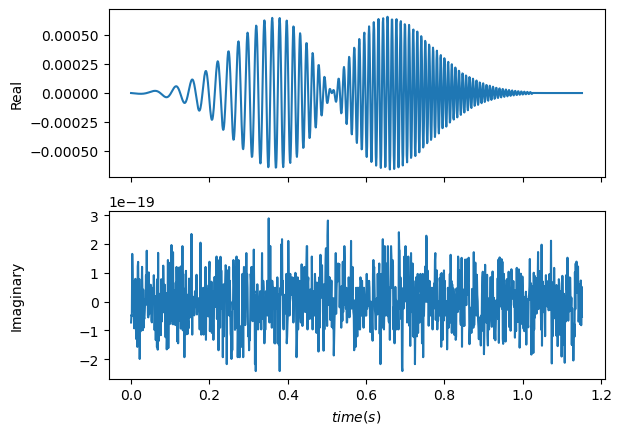

In [37]:
# create the time array
t = np.linspace(0, sample_rate * len(data), len(data))

# calculate Fourier transform of g(t)
G = fft([g(i, alpha) for i in t])

# take Fourier transform of output data
Data = fft(data)

# calculate Fourier transform of input using convolution theorem
F = Data / G

# calculate original signal
f = ifft(F)

# plot the results
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(t, np.real(f))
axs[0].set_ylabel("Real")
axs[1].plot(t, np.imag(f))
axs[1].set_ylabel("Imaginary")
axs[1].set_xlabel("$time (s)$")
fig.align_ylabels(axs);

**Problem 3**
Compute the Fourier transform $\tilde{f}(k)$ for

$$
f(x) = \left\{\begin{array}{ll}A\,(a-|x|) & -a < x < a \\ 0 & \text{Otherwise}\end{array}\right.
$$

Plot the result and compare with the analytic result from the previous homework assignment.

The analytic result I got from the previous homework was
$$
\tilde{f}(k) = \sqrt{\frac{2}{\pi}} \frac{A}{k^2} \big(1 - \cos(ka)\big).
$$

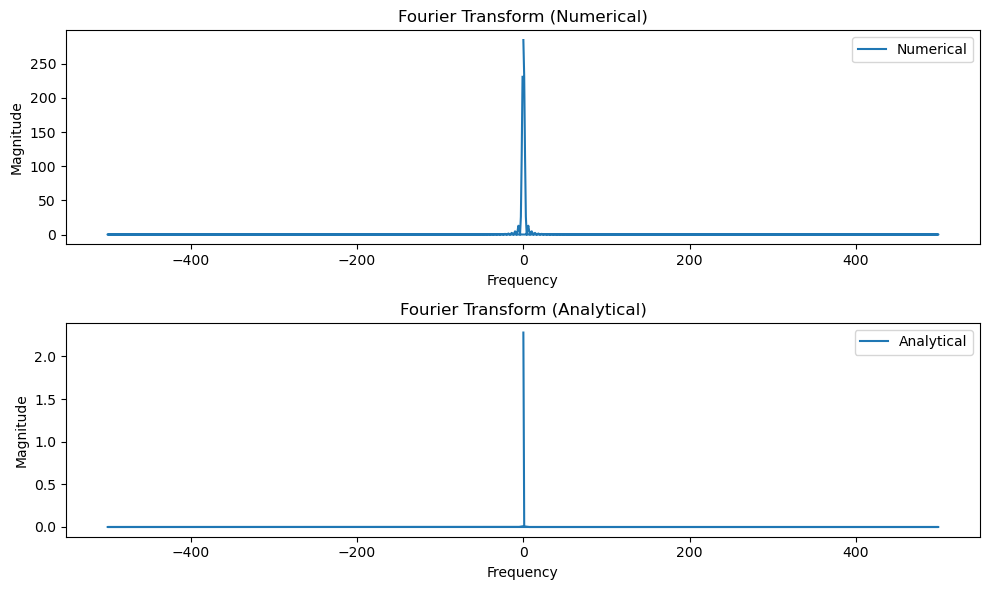

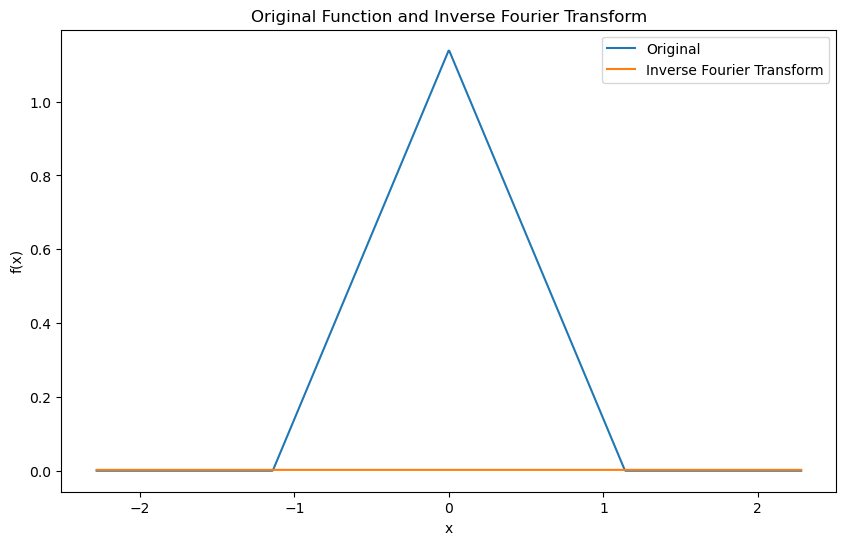

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# define the function
def f(x, A=1, a=1.14):
    if np.abs(x) < a:
        return A * (a - np.abs(x))
    else:
        return 0

# define the constants
a = 1.14
A = 1

# define transform constants
sample_rate = 1/1000
nyquist = 1/(2*sample_rate)

# create the x and y arrays
x = np.linspace(-2*a, 2*a, 1000)
y = np.array([f(i) for i in x])

# calculate the Fourier transform numerically
freq = fftfreq(len(x), sample_rate)
f_tilde = fft(y)

# define the analytical Fourier transform of f(x)
def f_tilde_n(k, A=1, a=1.14):
    if k == 0:
        return 2 * A * a
    else:
        return np.sqrt(2/np.pi) * A / (k**2) * (1 - np.cos(k*a))
         
# calculate the analytical Fourier transform of f(x)  
f_tilde_analytical = np.array([f_tilde_n(2*np.pi*f) for f in freq]) # 2pi factor to convert to angular frequency
f_n = ifft(f_tilde_analytical)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(f_tilde), label='Numerical')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform (Numerical)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(f_tilde_analytical), label='Analytical')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform (Analytical)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the original function and the inverse Fourier transform of the analytical Fourier transform
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original')
plt.plot(x, np.real(f_n), label='Inverse Fourier Transform')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function and Inverse Fourier Transform')
plt.legend()
plt.show()


**Problem 4**
Data from sampling a periodic signal at 1024 samples per second are stored in a text file
**prob4.txt** below. The values in the file are measured potentials
(in volts). To load text data into a numpy array, you can use the function **np.loadtxt(filename)**.

1. Load the data and prepare a properly labeled plot of the potential as a function of time.
    
2. Use the FFT to deduce the frequency composition of this signal, which is the
superposition of a fundamental and several harmonics with varying amplitudes.

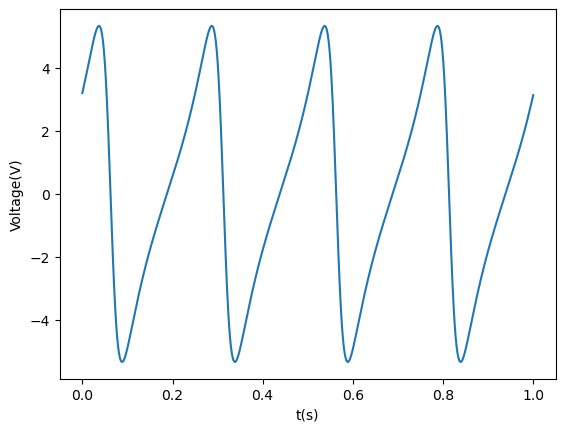

In [54]:
# import the data
data = np.loadtxt('prob4.txt')

# define constants
sample_rate = 1/1024
t = np.linspace(0, sample_rate * len(data), len(data))

# graph data
plt.figure()
plt.plot(t, data)
plt.ylabel('Voltage(V)')
plt.xlabel('t(s)')
plt.show()

In [64]:
# calculate Fourier transform of data
F = fft(data)

# calculate the frequency array
freq = fftfreq(len(data), sample_rate)

# filter out F and freq for only positive frequencies
F_pos = F[freq > 0]
freq_pos = freq[freq > 0]

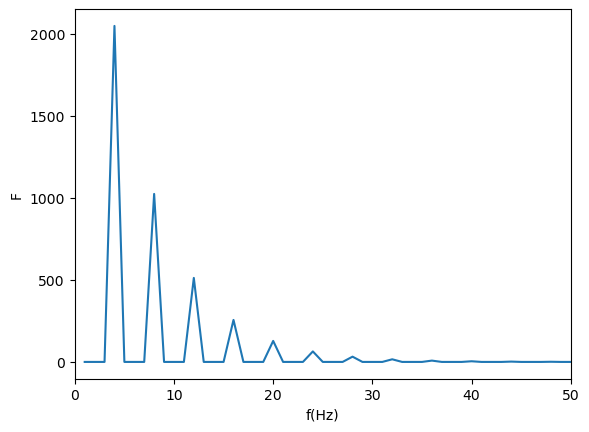

In [76]:
# graph the Fourier transform
plt.figure()
plt.plot(freq_pos, np.abs(F_pos))
plt.xlim(0, 50)
plt.ylabel('F')
plt.xlabel('f(Hz)')
plt.show()

In [83]:
# find peaks in the Fourier transform using the find_peaks function
from scipy.signal import find_peaks
peaks, _ = find_peaks(np.abs(F_pos))

# print peaks and their magnitudes
pm = zip(freq_pos[peaks], np.abs(F_pos[peaks]))
print(list(pm))

[(4.0, 2048.000000302991), (8.0, 1024.0000001599167), (12.0, 511.9999999285491), (16.0, 255.9999999786934), (20.0, 128.00000011904717), (24.0, 63.99999991943085), (28.0, 31.999999798134116), (32.0, 15.99999986374337), (36.0, 7.99999978534484), (40.0, 4.000000199083074), (44.0, 2.000000306120867), (48.0, 0.9999999130939164), (52.0, 2.465459187249266e-08), (56.0, 4.5820447721318365e-08), (60.0, 3.0265471364570976e-07), (64.0, 3.670432706822205e-08), (68.0, 5.0285594994288964e-08), (72.0, 2.138941201234754e-07), (76.0, 1.3823361735514224e-08), (80.0, 2.0193731665565228e-07), (84.0, 8.84845205708111e-08), (88.0, 2.1464555609017173e-08), (92.0, 2.6730279488513475e-07), (96.0, 2.799922782090632e-07), (100.0, 1.0796167526629139e-07), (104.0, 4.2631278278806886e-08), (108.0, 2.0725314301801681e-07), (112.0, 5.6834547932109225e-08), (116.0, 5.00433953404017e-08), (120.0, 5.9184572781277124e-08), (124.0, 7.777556941214014e-08), (128.0, 1.6000000258956215e-07), (132.0, 1.6692648469098182e-07), (1

From the printed frequencies and magnitudes above, we can see that this signal only consists of superpositions of waves with frequencies that are integer multiples of 4.0Hz. For the frequency $4n$, the corresponding magnitude is $2^{12-n}$. The fundamental is 4.0Hz, and everything else is harmonics.